In [3]:
#量子エラー研究.平均誤差率
from qiskit import IBMQ, transpile
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.tools.visualization import plot_histogram

In [4]:
from qiskit.providers.fake_provider import FakeVigo
device_backend =FakeVigo()

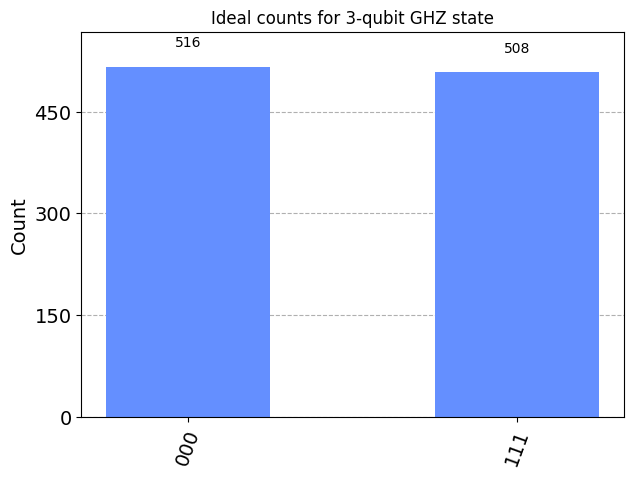

In [10]:
circ = QuantumCircuit(3, 3)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.measure([0,1,2],[0,1,2])

sim_ideal = AerSimulator()

result = sim_ideal.run(transpile(circ, sim_ideal)).result()
counts =result.get_counts(0)
plot_histogram(counts, title='Ideal counts for 3-qubit GHZ state')

In [14]:
#ibmq-vigo のsimulator
sim_vigo = AerSimulator.from_backend(device_backend)

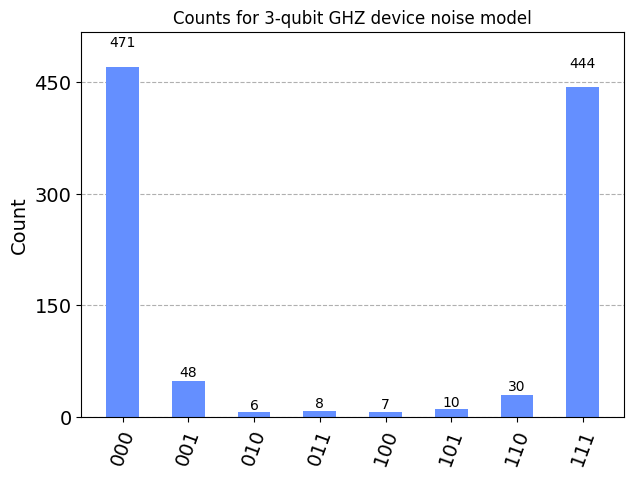

In [15]:
tcirc = transpile(circ,sim_vigo)

result_noise =sim_vigo.run(tcirc).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise, title="Counts for 3-qubit GHZ device noise model")

In [16]:
import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright